In [7]:
import requests
import seaborn as sns
import pandas as pd
import json

In [8]:
url = 'https://api.nal.usda.gov/fdc/v1/foods/list?&api_key=ICu1Wkkiw8z5iPRhXavSJCTnKxhi2aDPzbCmzcyN'

response = requests.get(url)

response = response.json()

print(response)

[{'fdcId': 2353623, 'description': 'A Low-Starch and High-Fiber Diet Intervention Impacts the Microbial Community of Raw Bovine Milk', 'dataType': 'Experimental', 'publicationDate': '2022-10-28', 'foodNutrients': []}, {'fdcId': 2341752, 'description': 'Abalone', 'dataType': 'Survey (FNDDS)', 'publicationDate': '2022-10-28', 'foodCode': '26301110', 'foodNutrients': [{'number': '203', 'name': 'Protein', 'amount': 21.2, 'unitName': 'G'}, {'number': '204', 'name': 'Total lipid (fat)', 'amount': 6.12, 'unitName': 'G'}, {'number': '205', 'name': 'Carbohydrate, by difference', 'amount': 7.46, 'unitName': 'G'}, {'number': '208', 'name': 'Energy', 'amount': 177, 'unitName': 'KCAL'}, {'number': '221', 'name': 'Alcohol, ethyl', 'amount': 0.0, 'unitName': 'G'}, {'number': '255', 'name': 'Water', 'amount': 62.7, 'unitName': 'G'}, {'number': '262', 'name': 'Caffeine', 'amount': 0.0, 'unitName': 'MG'}, {'number': '263', 'name': 'Theobromine', 'amount': 0.0, 'unitName': 'MG'}, {'number': '269', 'name'

In [11]:
def Foods():
    pageNum = 1
    foods = []

    while True:
        url = 'https://api.nal.usda.gov/fdc/v1/foods/list?&api_key=ICu1Wkkiw8z5iPRhXavSJCTnKxhi2aDPzbCmzcyN&pageSize=200&pageNumber=' + str(pageNum) 
        req = requests.get(url)
        if not req.ok:
            break
        foods = foods + req.json()
        pageNum += 1
        
    return foods
    
    


In [12]:
listOfFoods = Foods()
#print(listOfFoods)

In [39]:
def getIron():
    
    iron = []
    for i in listOfFoods:
        name = i['description']
        for x in i['foodNutrients']:
            if x['name'] == 'Iron, Fe':
                amount = x['amount']
                temp = {'Name':name,'Iron':amount}
                iron.append(temp)
    return iron


In [40]:
data = getIron()
for in data:
    if(temp)

In [41]:
df = pd.DataFrame(data)

In [42]:
df.head()

,Name,Iron
0,Abalone,3.97
1,"Abiyuch, raw",1.61
2,"Acerola juice, raw",0.50
3,"Acerola, (west indian cherry), raw",0.20
4,Acorn stew (Apache),1.00


In [43]:
top10 = df.sort_values(by="Iron",ascending=False)
top10 = top10[0:10]

In [44]:
top10.head(10)

,Name,Iron
3367,"Cereals ready-to-eat, RALSTON Enriched Wheat B...",67.7
370,"Babyfood, cereal, oatmeal, with honey, dry",67.2
363,"Babyfood, cereal, oatmeal, dry fortified",64.1
276,"Baby Toddler cereal, oatmeal, dry",64.1
364,"Babyfood, cereal, Oatmeal, dry, GERBER, SINGLE...",64.0
274,"Baby Toddler cereal, oatmeal with fruit, dry",61.0
8976,"Parsley, freeze-dried",53.9
373,"Babyfood, cereal, rice, dry fortified",53.0
280,"Baby Toddler cereal, rice, dry",53.0
278,"Baby Toddler cereal, rice with fruit, dry",50.4


<AxesSubplot:xlabel='Iron', ylabel='Name'>

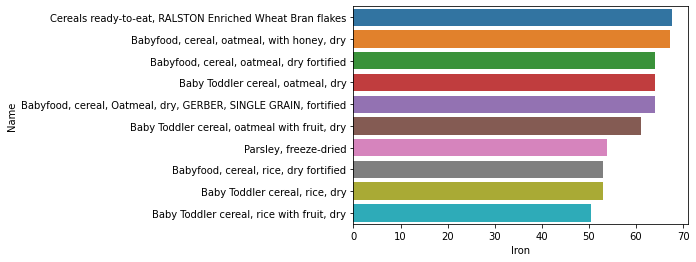

In [30]:
sns.barplot(data = top10, x = "Iron", y = "Name")

,Name,Iron
0,Abalone,3.97
1,"Abiyuch, raw",1.61
2,"Acerola juice, raw",0.50
3,"Acerola, (west indian cherry), raw",0.20
4,Acorn stew (Apache),1.00


,Name,Iron
3367,"Cereals ready-to-eat, RALSTON Enriched Wheat B...",67.7
370,"Babyfood, cereal, oatmeal, with honey, dry",67.2
363,"Babyfood, cereal, oatmeal, dry fortified",64.1
276,"Baby Toddler cereal, oatmeal, dry",64.1
364,"Babyfood, cereal, Oatmeal, dry, GERBER, SINGLE...",64.0
274,"Baby Toddler cereal, oatmeal with fruit, dry",61.0
8976,"Parsley, freeze-dried",53.9
373,"Babyfood, cereal, rice, dry fortified",53.0
280,"Baby Toddler cereal, rice, dry",53.0
278,"Baby Toddler cereal, rice with fruit, dry",50.4
